<a href="https://colab.research.google.com/github/armandres/Ejercicio_diplomado/blob/main/Copia_de_Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [5]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  10.7M      0  0:00:02  0:00:02 --:--:-- 10.7M


In [6]:
# leemos el dataframe usando read_csv
import pandas as pd
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [7]:
#Tiremos la columna Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [8]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0
5,Mexico,Hacienda La Lomita,Rosé,Oxidized cherry and strawberry aromas settle o...,83,21.0
6,Mexico,Monte Xanic,Cabernet Franc,"With aromas of salsa, chili peppers and tomato...",86,39.0
7,Mexico,Tres Valles,Sauvignon Blanc,Mild hints of tropical fruit are less than con...,84,15.0
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,"This odd blend of Barbera, Cabernet Sauvignon,...",83,22.0
9,Mexico,Monte Xanic,Red Blend,This Cabernet blend is one of Baja's best reds...,90,56.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

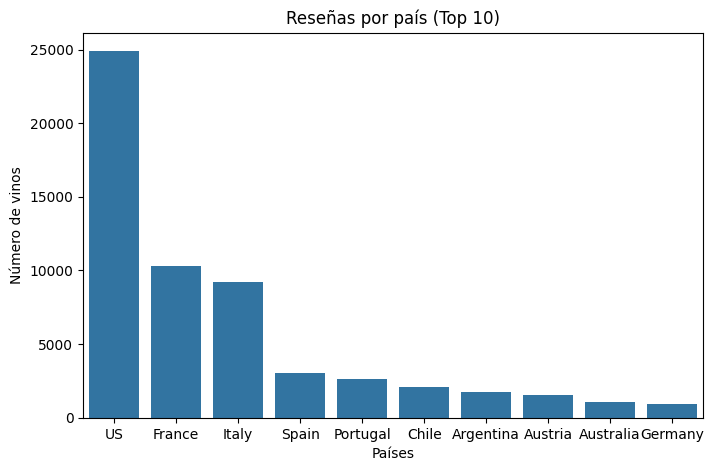

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

plt.figure(figsize=(8,5))
sns.barplot(x=x[:10], y=y[:10])

# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

In [10]:
precio_por_pais = df[['country','price']]
#Debo filtrar los NaN
precio_por_pais_sin_NaN = precio_por_pais.dropna()
promedios = precio_por_pais_sin_NaN.groupby("country")["price"].mean()  #<COMPLETA>
x = promedios.index
y = promedios.values

#print(promedios["y"])
#print(precio_por_pais_sin_NaN)
print(promedios)

country
Argentina                 23.783112
Armenia                   14.000000
Australia                 36.512381
Austria                   30.970980
Bosnia and Herzegovina    13.000000
Brazil                    23.000000
Bulgaria                  13.921875
Canada                    35.712871
Chile                     21.338757
Croatia                   24.809524
Cyprus                    16.000000
Czech Republic            23.666667
England                   51.275862
France                    41.520469
Georgia                   18.270270
Germany                   41.057325
Greece                    21.894495
Hungary                   52.839286
India                     13.500000
Israel                    31.500000
Italy                     39.633606
Lebanon                   30.578947
Luxembourg                23.000000
Macedonia                 15.833333
Mexico                    26.800000
Moldova                   17.965517
Morocco                   20.000000
New Zealand         

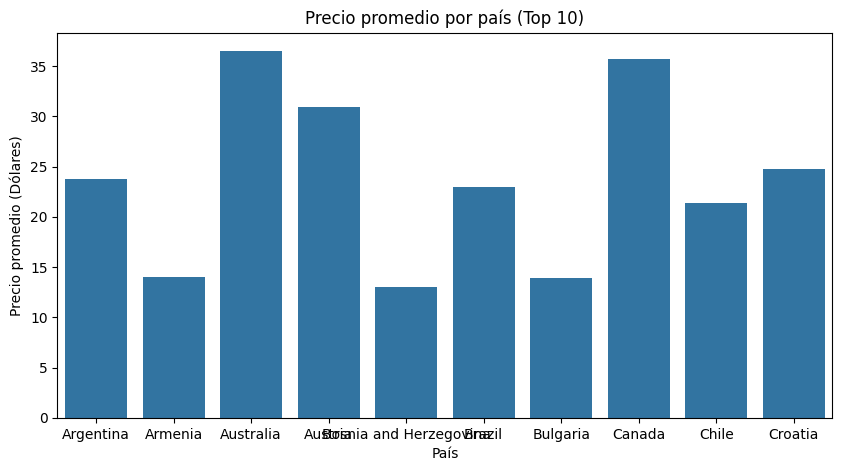

In [12]:
"""
SECUENCIA:
1.- Crear un dataset que contengas las columnas "contry" y "price"
2.- Filtrar los NaN
3.- Obtener el precio promedio por país
"""
precio_por_pais = df[['country','price']]
#Debo filtrar los NaN
precio_por_pais_sin_NaN = precio_por_pais.dropna()
promedios = precio_por_pais_sin_NaN.groupby("country")["price"].mean()  #<COMPLETA>
x = promedios.index
y = promedios.values
#Hasta aquí los precios no están ordenados de manera descendente
plt.figure(figsize=(10,5))
sns.barplot(x=x[:10], y=y[:10])
plt.xlabel("País")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio por país (Top 10)")

plt.show()

<ipython-input-50-ad96c8365e11>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='viridis')  # Utiliza una paleta de colores (ejemplo: 'viridis')


Text(0, 0.5, 'Precio Promedio')

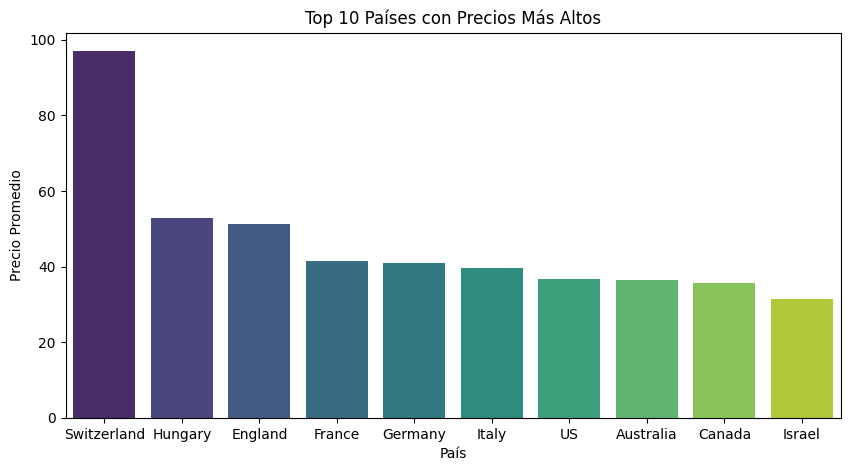

In [ ]:
promedios_ordenados = promedios.sort_values(ascending=False)

# Selecciono los primeros 10 países con los precios promedio más altos
top_10_paises = promedios_ordenados.head(10)

# Se extraen los nombres de los países y sus precios promedio
x = top_10_paises.index  # Países
y = top_10_paises.values  # Precios promedio

# Creación del gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=x, y=y, palette='viridis')  # Utiliza una paleta de colores (ejemplo: 'viridis')
plt.title('Top 10 Países con Precios Más Altos')
plt.xlabel('País')
plt.ylabel('Precio Promedio')

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

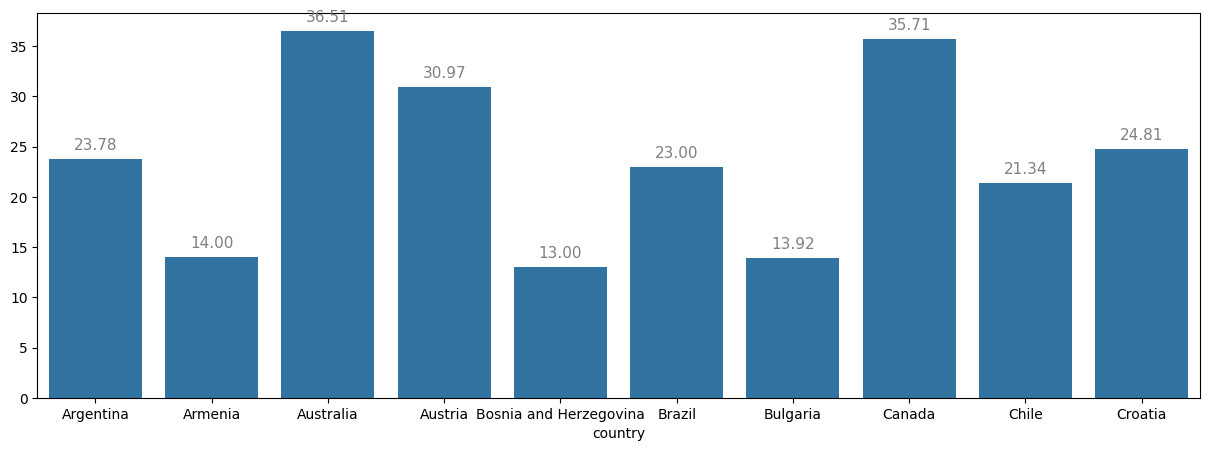

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#Definimos el tamaño del canvas
plt.figure(figsize=(15,5))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x=x[:10], y=y[:10])

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')

plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

In [ ]:
"""
SECUENCIA DE PASOS
1.-
2.-
3.-
4.-
5.-
6.-
"""
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

In [ ]:
"""
SECUENCIA:

"""
plt.figure(figsize=(10,5))

### TU CODIGO AQUI ##
promedios = #<COMPLETA>

#####################

plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Razón Puntos/Precio")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
plt.show()

### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

In [ ]:
#TU CODIGO


### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [ ]:
#TU CODIGO
variedades = #<COMPLETA>

### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [ ]:
#TU CODIGO
bodegas = #<COMPLETA>


### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [ ]:
#TU CODIGO
p_v = #<COMPLETA>  #nuevo dataFrame que vamos a construir y luego observar


#### &#9758; Observa la relación puntos-precio por país

In [ ]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

In [ ]:
sns.pairplot(p_v, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

In [ ]:
#TU CODIGO


#### &#9758; Observa las distribuciones por pares en función de la bodega.

In [ ]:
#TU CODIGO


#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

In [ ]:
#TU CODIGO


#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

In [ ]:
#TU CODIGO


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

In [ ]:
#TU CODIGO


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

In [ ]:
#TU CODIGO


### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [ ]:
#TU CODIGO
df3 = #<COMPLETA> # nuevo dataFrame que contiene la unión de las tablas

#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [ ]:
# TU CODIGO


#### &#9758; Observa la relación puntos-precio por país

In [ ]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

In [ ]:
mx_top = #<COMPLETA>
sns.pairplot(mx_top, hue="country",height=3,palette='bright')

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

In [ ]:
medias = #<COMPLETA>

# TU CODIGO


#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

In [ ]:
# TU CODIGO
